<h1>Group Project: U.S. Medical Insurance Costs</h1>

Questions for the project:
* What factor is most correlated to BMI?
* What is the average age of the patients in the dataset.
* What’s the regional breakdown of the patients?
* What’s the mean and median cost of smoker and non-smoker?
* Figure out what the average age is for someone who has at least one child in this dataset.
* Who pays the most for insurance and what factors into that decision?


In [271]:
# Import Libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the data from CSV file
df = pd.read_csv('insurance.csv')

<h1>Data Preview</h1>
Import insurance.csv into your Python file and preview the first 10 rows.

In [274]:
with open('insurance.csv', 'r') as ins:
    csv_reader = csv.reader(ins)
    header = next(csv_reader)  # Read the header
    
    print(f"Header: {header}")
    
    # Print the first 10 rows
    for i, row in enumerate(csv_reader):
        if i < 10:
            print(f"Row {i+1}: {row}")
        else:
            break

Header: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
Row 1: ['19', 'female', '27.9', '0', 'yes', 'southwest', '16884.924']
Row 2: ['18', 'male', '33.77', '1', 'no', 'southeast', '1725.5523']
Row 3: ['28', 'male', '33', '3', 'no', 'southeast', '4449.462']
Row 4: ['33', 'male', '22.705', '0', 'no', 'northwest', '21984.47061']
Row 5: ['32', 'male', '28.88', '0', 'no', 'northwest', '3866.8552']
Row 6: ['31', 'female', '25.74', '0', 'no', 'southeast', '3756.6216']
Row 7: ['46', 'female', '33.44', '1', 'no', 'southeast', '8240.5896']
Row 8: ['37', 'female', '27.74', '3', 'no', 'northwest', '7281.5056']
Row 9: ['37', 'male', '29.83', '2', 'no', 'northeast', '6406.4107']
Row 10: ['60', 'female', '25.84', '0', 'no', 'northwest', '28923.13692']


<h1>Check data for errors:</h1>

<ul>
    <li>Check if 'age' is integer.</li>
    <li>Check if 'sex' is male or female.</li>
    <li>Check if 'bmi' is float.</li>
    <li>Check if 'children' is integer.</li>
    <li>Check if 'smoker' is yes or no.</li>
    <li>Check 'region' for list of all regions.</li>
    <li>Check if 'charges' is a float number.</li>
</ul>

In [277]:
# Define valid values
valid_sex = {"male", "female"}
valid_smoker = {"yes", "no"}
valid_region = {"southwest", "southeast", "northwest", "northeast"}

# Convert column names to lowercase (optional, ensures consistency)
df.columns = df.columns.str.lower()

# Define validation functions
def validate_age(age):
    return isinstance(age, int) and age >= 0

def validate_sex(sex):
    return sex in valid_sex

def validate_bmi(bmi):
    return isinstance(bmi, (int, float)) and bmi > 0

def validate_children(children):
    return isinstance(children, int) and children >= 0

def validate_smoker(smoker):
    return smoker in valid_smoker

def validate_region(region):
    return region in valid_region

def validate_charges(charges):
    return isinstance(charges, (int, float)) and charges >= 0

# Apply validations
invalid_rows = df[
    ~df["age"].apply(validate_age) |
    ~df["sex"].apply(validate_sex) |
    ~df["bmi"].apply(validate_bmi) |
    ~df["children"].apply(validate_children) |
    ~df["smoker"].apply(validate_smoker) |
    ~df["region"].apply(validate_region) |
    ~df["charges"].apply(validate_charges)
]

# Print invalid rows or confirmation message
if not invalid_rows.empty:
    print("Invalid Rows Found:")
    print(invalid_rows)
else:
    print("No errors found in the dataset.")


No errors found in the dataset.


In [279]:
with open('insurance.csv', 'r') as f:
    reader = csv.DictReader(f)
    data = list(reader)

# Convert values to proper types
for row in data:
    row['age'] = int(row['age'])
    row['children'] = int(row['children'])
    row['charges'] = float(row['charges'])

# Total patients
total_patients = len(data)

# Find youngest and oldest
youngest = min(data, key=lambda x: x['age'])
oldest = max(data, key=lambda x: x['age'])

# Find cheapest and most expensive charges
cheapest = min(data, key=lambda x: x['charges'])
most_expensive = max(data, key=lambda x: x['charges'])

# Smoker stats
smokers = sum(1 for row in data if row['smoker'] == 'yes')
non_smokers = total_patients - smokers
smoker_pct = (smokers / total_patients) * 100
non_smoker_pct = (non_smokers / total_patients) * 100

# Children stats
with_kids = sum(1 for row in data if row['children'] > 0)
without_kids = total_patients - with_kids
with_kids_pct = (with_kids / total_patients) * 100
without_kids_pct = (without_kids / total_patients) * 100

# Print summary
print("Patient Summary:\n")
print(f"Total Patients  : {total_patients}\n")

print(f"Youngest Patient: Age {youngest['age']}, Charges: ${youngest['charges']:,.2f}")
print(f"Oldest Patient  : Age {oldest['age']}, Charges: ${oldest['charges']:,.2f}\n")

print(f"Cheapest Cost   : ${cheapest['charges']:,.2f} (Age {cheapest['age']}, Smoker: {cheapest['smoker']})")
print(f"Most Expensive  : ${most_expensive['charges']:,.2f} (Age {most_expensive['age']}, Smoker: {most_expensive['smoker']})\n")

print("Smoker Status:")
print(f"  Smokers       : {smoker_pct:.2f}%")
print(f"  Non-Smokers   : {non_smoker_pct:.2f}%\n")

print("Children:")
print(f"  With Kids     : {with_kids_pct:.2f}%")
print(f"  Without Kids  : {without_kids_pct:.2f}%")

Patient Summary:

Total Patients  : 1338

Youngest Patient: Age 18, Charges: $1,725.55
Oldest Patient  : Age 64, Charges: $30,166.62

Cheapest Cost   : $1,121.87 (Age 18, Smoker: no)
Most Expensive  : $63,770.43 (Age 54, Smoker: yes)

Smoker Status:
  Smokers       : 20.48%
  Non-Smokers   : 79.52%

Children:
  With Kids     : 57.10%
  Without Kids  : 42.90%


<h1>Visualizing the Data</h1>
<p>My analysis suggests that the 'region' variable may not be a useful predictor in this sample, as the 'southeast' region has a disproportionately higher participation rate. This region also correlates with a higher number of smokers, which could skew the results.
</p>
<ul>
    <li>Coorelation Matrix</li>
    <li>Regional Breakdown of Patients</li>
    <li>Smoker Participation Percentage by Region</li>
    <li>Average BMI by Region</li>
    <li>Mean and Median Charges for Smokers and Non-Smokers</li>
</ul>

Correlation with 'charges':
charges: 1.000000
smoker_yes: 0.787251
age: 0.299008
bmi: 0.198341
region_southeast: 0.073982
children: 0.067998
sex_male: 0.057292
region_northwest: -0.039905
region_southwest: -0.043210


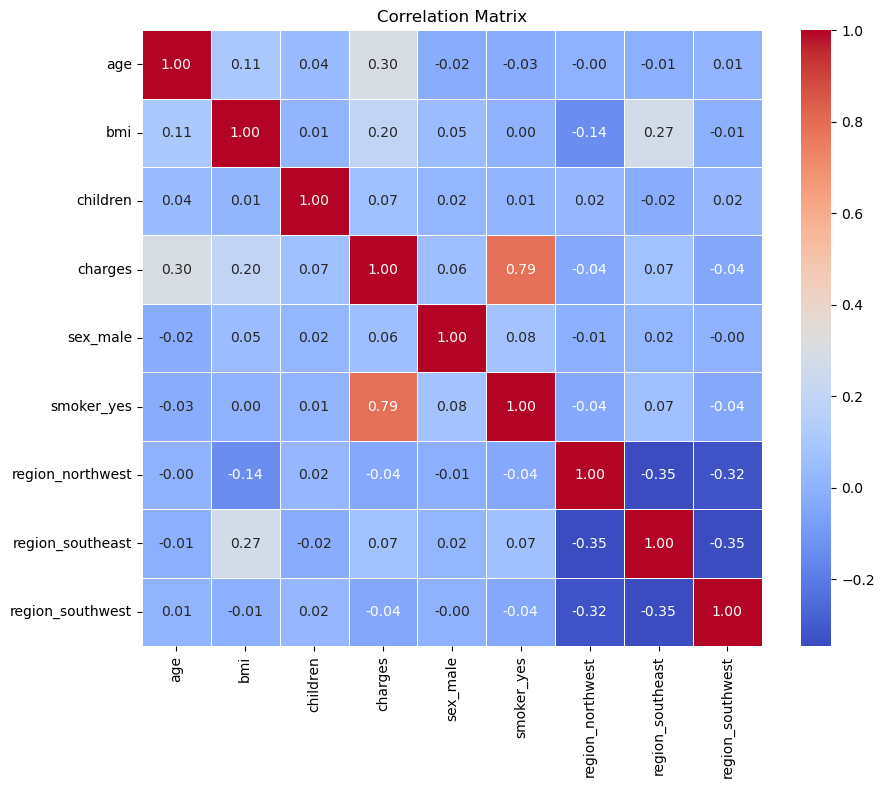


Linear Regression Coefficients (Feature Importance):
smoker_yes          : $23,848.53
children            : $475.50
bmi                 : $339.19
age                 : $256.86
sex_male            : $-131.31
region_northwest    : $-352.96
region_southwest    : $-960.05
region_southeast    : $-1,035.02


In [282]:
# Step 1: Convert categorical variables to numeric (one-hot encoding)
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Step 2: Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Step 3: Print the correlation of all variables with 'charges'
correlation_with_charges = correlation_matrix['charges']

# Sort the correlation values in descending order
correlation_with_charges_sorted = correlation_with_charges.sort_values(ascending=False)

# Print each feature name with its correlation value, sorted by correlation
print("Correlation with 'charges':")
for feature, correlation in correlation_with_charges_sorted.items():
    print(f"{feature}: {correlation:.6f}")

# Step 4: Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Step 5: Perform linear regression to find feature importance
X = df_encoded.drop(columns=['charges'])  # all columns except 'charges'
y = df_encoded['charges']  # target variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients (importance of each feature)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

# Format coefficients as currency with $ and rounded to two decimal places
coefficients['Formatted Coefficient'] = coefficients['Coefficient'].apply(lambda x: f"${x:,.2f}")

# Sort by the coefficients in descending order (positive first, then negative)
coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=False)

# Print the sorted coefficients
print("\nLinear Regression Coefficients (Feature Importance):")
for feature, value in coefficients_sorted['Formatted Coefficient'].items():
    print(f"{feature: <20}: {value}")


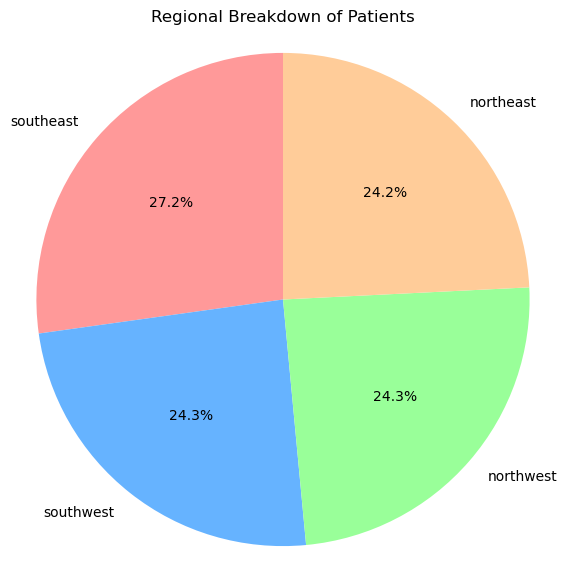

In [284]:
# Step 1: Count the occurrences of each region
region_counts = df['region'].value_counts()

# Step 2: Plot a pie chart of the region distribution
plt.figure(figsize=(7, 7))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Regional Breakdown of Patients')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

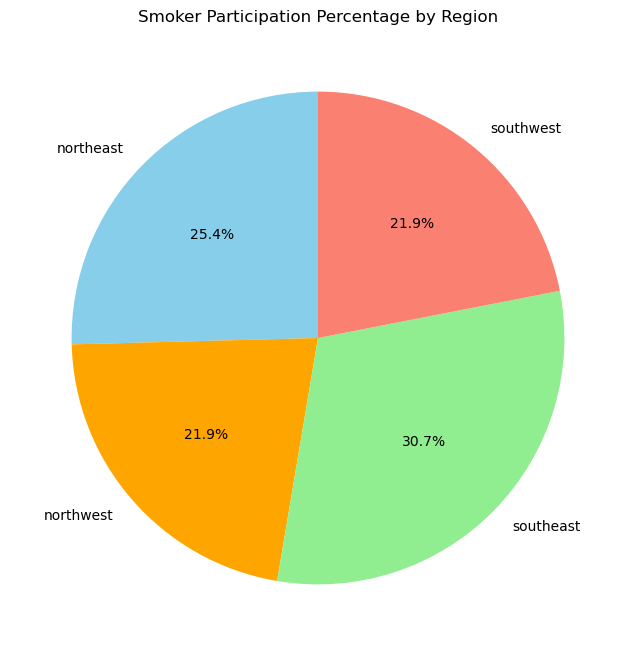

In [287]:
# Step 1: Filter the dataset for smokers
smoker_data = df[df['smoker'] == 'yes']

# Step 2: Group by region and count smokers
region_smoker_counts = smoker_data['region'].value_counts()

# Step 3: Group by region and count total patients (smokers and non-smokers)
region_total_counts = df['region'].value_counts()

# Step 4: Calculate the percentage of smokers in each region
smoker_percentage = (region_smoker_counts / region_total_counts) * 100

# Step 5: Create a pie chart
plt.figure(figsize=(8, 8))
smoker_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'lightgreen', 'salmon'])
plt.title('Smoker Participation Percentage by Region')
plt.ylabel('')  # Removes the 'Region' label on the side of the chart
plt.show()


Average BMI by Region:
northeast: 29.17
northwest: 29.20
southeast: 33.36
southwest: 30.60


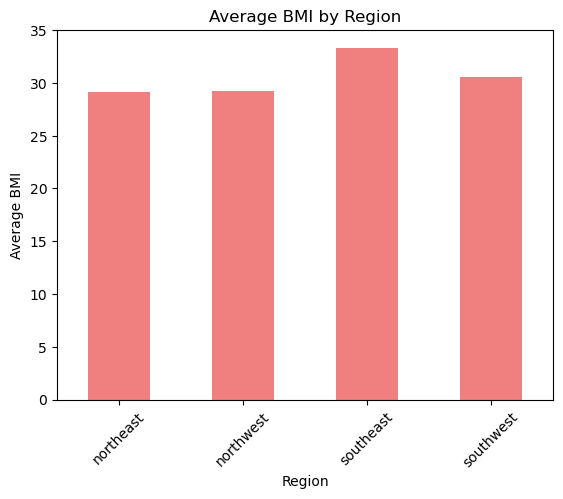

In [289]:
# Load the data from CSV file
df = pd.read_csv('insurance.csv')

# Step 1: Group by region and calculate the mean BMI for each region
bmi_by_region = df.groupby('region')['bmi'].mean()

# Step 2: Display the average BMI for each region
average_bmi_by_region = df.groupby('region')['bmi'].mean()
print("\nAverage BMI by Region:")
for region, bmi in average_bmi_by_region.items():
    print(f"{region}: {bmi:.2f}")

# Step 3: Visualize the average BMI by region in a bar chart
bmi_by_region.plot(kind='bar', color='lightcoral')
plt.title('Average BMI by Region')
plt.xlabel('Region')
plt.ylabel('Average BMI')
plt.xticks(rotation=45)
plt.show()


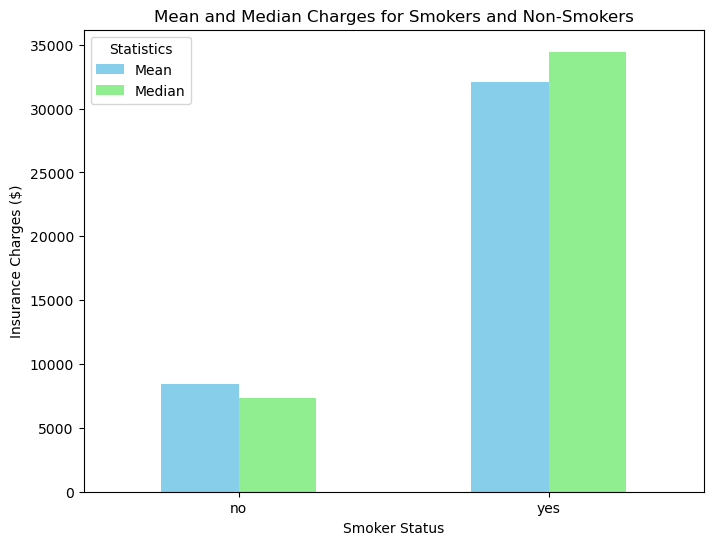

In [291]:
# Calculate mean and median charges for smoker and non-smoker
smoker_stats = df.groupby('smoker')['charges'].agg(['mean', 'median'])

# Plotting the bar plot
smoker_stats.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'lightgreen'])
plt.title('Mean and Median Charges for Smokers and Non-Smokers')
plt.ylabel('Insurance Charges ($)')
plt.xticks(rotation=0)
plt.xlabel('Smoker Status')

# Add a legend
plt.legend(title="Statistics", labels=["Mean", "Median"])

# Show the plot
plt.show()

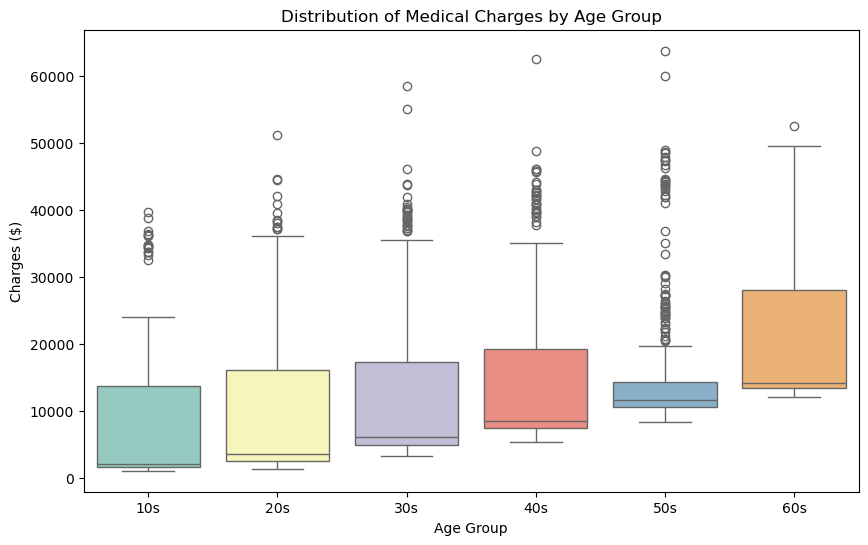

In [293]:
# Create a new column 'age_group' by binning ages into 10-year intervals
df['age_group'] = pd.cut(df['age'], bins=range(10, 71, 10), right=False, labels=['10s', '20s', '30s', '40s', '50s', '60s'])

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='charges', data=df, hue='age_group', palette='Set3', legend=False)

# Add title and labels
plt.title('Distribution of Medical Charges by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Charges ($)')

plt.show()